In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import os
from datetime import datetime

print("🚀 Starting Image Resizing Pipeline")
print("👤 Member: IT24102031 - Disanayaka K.G.G.S")
print("🔧 Technique: Resizing to 80×80 pixels")
print("👥 Group: 2025-Y2-S1-MLB-B8G1-04")

🚀 Starting Image Resizing Pipeline
👤 Member: IT24102031 - Disanayaka K.G.G.S
🔧 Technique: Resizing to 80×80 pixels
👥 Group: 2025-Y2-S1-MLB-B8G1-04


In [2]:
def load_unicode_mapping():
    """Load the Unicode mapping file"""
    mapping_file = Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings/unicode_mapping.json")

    if mapping_file.exists():
        with open(mapping_file, 'r', encoding='utf-8') as f:
            mapping = json.load(f)
        print(f"Unicode mapping loaded: {len(mapping['class_to_unicode'])} classes")
        return mapping
    else:
        print("Unicode mapping file not found!")
        return None

unicode_mapping = load_unicode_mapping()

Unicode mapping loaded: 454 classes


In [3]:
def create_folder_structure():
    """Create necessary folders for processing"""

    paths = {
        'input_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102051"),
        'output_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102031"),
        'eda_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031"),
        'mapping_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings")
    }

    for name, path in paths.items():
        path.mkdir(parents=True, exist_ok=True)
        print(f"📁 Created: {path}")

    return paths

folder_paths = create_folder_structure()
print("\nFolder structure ready!")

📁 Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102051
📁 Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102031
📁 Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031
📁 Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings

Folder structure ready!


In [4]:
def resize_image(image_path, target_size=(80, 80)):
    """Resize image to target dimensions while preserving aspect ratio options"""
    try:
        # Read normalized image
        image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        if image is None:
            return None, None, None

        original_shape = image.shape

        # Method 1: Direct resize (may distort aspect ratio)
        resized_direct = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

        # Method 2: Resize with padding to maintain aspect ratio
        h, w = image.shape
        target_h, target_w = target_size

        # Calculate scaling factor to fit within target size
        scale = min(target_h / h, target_w / w)
        new_h, new_w = int(h * scale), int(w * scale)

        # Resize with preserved aspect ratio
        resized_temp = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

        # Create padded image
        resized_padded = np.zeros((target_h, target_w), dtype=image.dtype)
        start_h = (target_h - new_h) // 2
        start_w = (target_w - new_w) // 2
        resized_padded[start_h:start_h+new_h, start_w:start_w+new_w] = resized_temp

        return image, resized_direct, resized_padded, original_shape

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None, None

def get_character_info(class_id):
    """Get character info from mapping"""
    if unicode_mapping and str(class_id) in unicode_mapping['class_to_unicode']:
        return unicode_mapping['class_to_unicode'][str(class_id)]
    return {'unicode': f'Class_{class_id}', 'category': 'unknown'}

print("Resizing function ready!")

Resizing function ready!


In [5]:
def process_sample_images(class_id=1, max_samples=5):
    """Process sample images for testing"""

    # Setup paths - taking input from Member C's normalized output
    input_path = folder_paths['input_base'] / "normalized_train" / str(class_id)
    output_path = folder_paths['output_base'] / "resized_80x80_train" / str(class_id)
    output_path.mkdir(parents=True, exist_ok=True)

    char_info = get_character_info(class_id)
    print(f"🔤 Processing Class {class_id}: '{char_info['unicode']}' ({char_info['category']})")

    if not input_path.exists():
        print(f"Input path not found: {input_path}")
        print("Member C's normalized output is required as input!")
        return []

    image_files = []
    for ext in ['*.png', '*.jpg', '*.jpeg']:
        image_files.extend(list(input_path.glob(ext)))

    if not image_files:
        print(f"⚠️  No image files found in {input_path}")
        return []

    processed_data = []
    for i, img_file in enumerate(image_files[:max_samples]):
        print(f"🔧 Processing: {img_file.name}")

        result = resize_image(img_file)
        if len(result) == 4:
            original, resized_direct, resized_padded, original_shape = result
        else:
            continue

        if original is not None and resized_direct is not None:
            # Save resized image (using padded version to preserve aspect ratio)
            output_file = output_path / f"resized_{img_file.name}"
            cv2.imwrite(str(output_file), resized_padded)

            processed_data.append({
                'original': original,
                'resized_direct': resized_direct,
                'resized_padded': resized_padded,
                'filename': img_file.name,
                'original_shape': original_shape,
                'target_shape': (80, 80),
                'original_pixels': original_shape[0] * original_shape[1],
                'resized_pixels': 80 * 80
            })

            print(f"Saved: {output_file.name} | {original_shape} → (80, 80)")
        else:
            print(f"Failed: {img_file.name}")

    print(f"\Processed {len(processed_data)} images successfully!")
    return processed_data

sample_data = process_sample_images(class_id=1, max_samples=5)

🔤 Processing Class 1: 'අ' (independent_vowel)
🔧 Processing: norm_hist_eq_gray_39xccd.jpg
Saved: resized_norm_hist_eq_gray_39xccd.jpg | (80, 80) → (80, 80)
🔧 Processing: norm_hist_eq_gray_29xccd.jpg
Saved: resized_norm_hist_eq_gray_29xccd.jpg | (80, 80) → (80, 80)
🔧 Processing: norm_hist_eq_gray_ad_mlk31.jpg
Saved: resized_norm_hist_eq_gray_ad_mlk31.jpg | (80, 80) → (80, 80)
🔧 Processing: norm_hist_eq_gray_ad_mlk30.jpg
Saved: resized_norm_hist_eq_gray_ad_mlk30.jpg | (80, 80) → (80, 80)
🔧 Processing: norm_hist_eq_gray_w48.jpg
Saved: resized_norm_hist_eq_gray_w48.jpg | (80, 80) → (80, 80)
\Processed 5 images successfully!


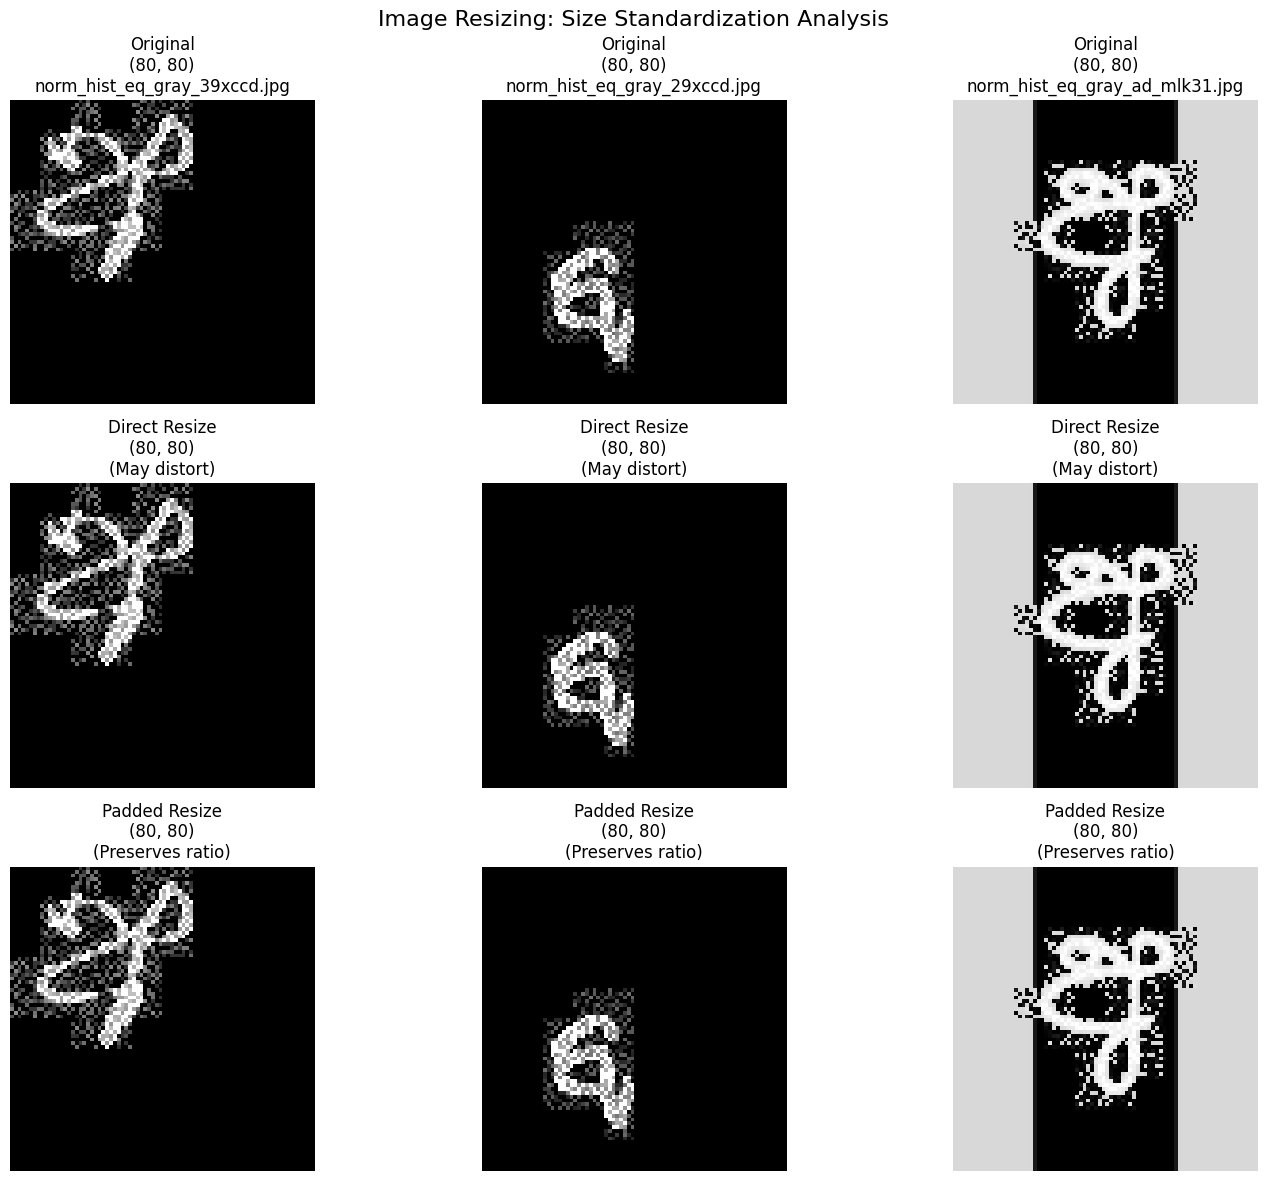

Resizing comparison saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031/resizing_comparison.png


In [6]:
def create_resizing_comparison(sample_data):
    """Create resizing comparison visualization"""

    if not sample_data:
        print("No sample data available for visualization")
        return

    n_samples = min(3, len(sample_data))
    fig, axes = plt.subplots(3, n_samples, figsize=(15, 12))
    fig.suptitle('Image Resizing: Size Standardization Analysis', fontsize=16)

    if n_samples == 1:
        axes = axes.reshape(3, 1)

    for i in range(n_samples):
        sample = sample_data[i]

        # Original image
        axes[0, i].imshow(sample['original'], cmap='gray')
        axes[0, i].set_title(f'Original\n{sample["original_shape"]}\n{sample["filename"]}')
        axes[0, i].axis('off')

        # Direct resize (may distort)
        axes[1, i].imshow(sample['resized_direct'], cmap='gray')
        axes[1, i].set_title(f'Direct Resize\n{sample["target_shape"]}\n(May distort)')
        axes[1, i].axis('off')

        # Padded resize (preserves aspect ratio)
        axes[2, i].imshow(sample['resized_padded'], cmap='gray')
        axes[2, i].set_title(f'Padded Resize\n{sample["target_shape"]}\n(Preserves ratio)')
        axes[2, i].axis('off')

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'resizing_comparison.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Resizing comparison saved: {output_file}")

create_resizing_comparison(sample_data)

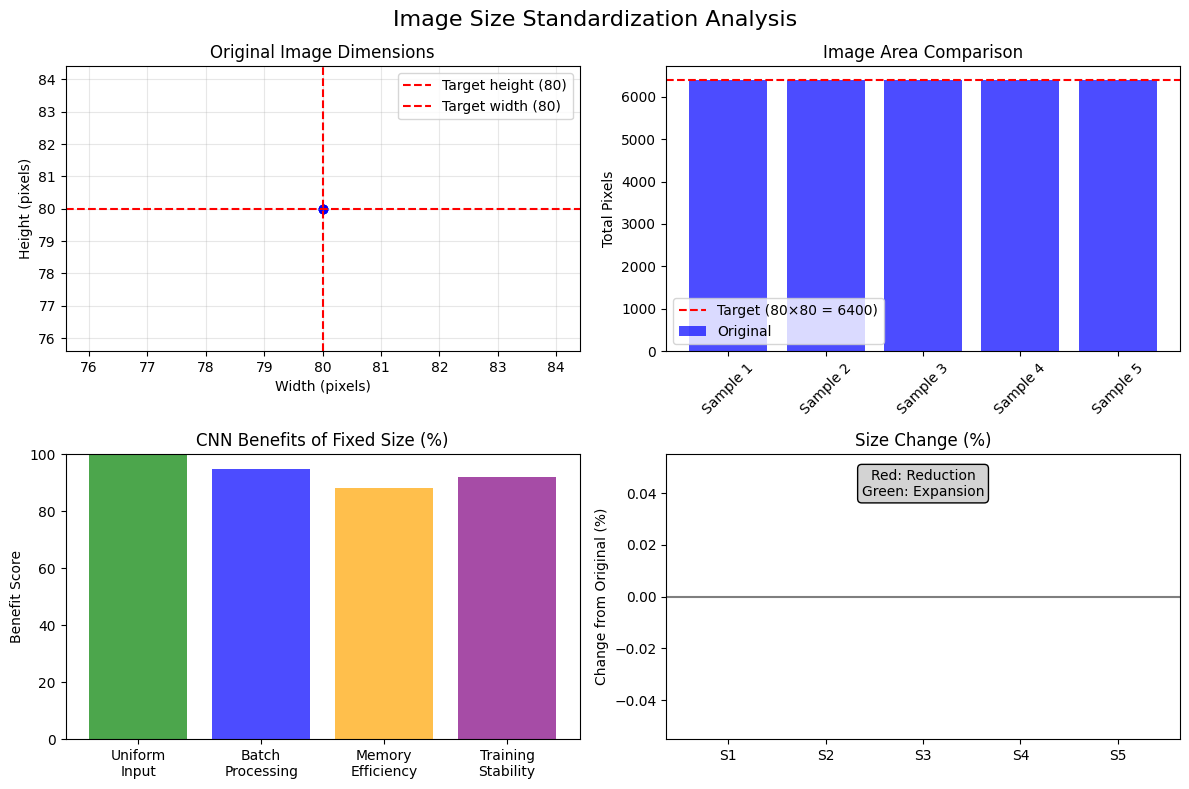

Size analysis saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031/size_analysis.png
Average original area: 6400 pixels
Target area: 6400 pixels
Images processed: 5


In [7]:
def analyze_size_distribution(sample_data):
    """Analyze original size distribution and resizing impact"""

    if not sample_data:
        print("No data for analysis")
        return {}

    original_shapes = [d['original_shape'] for d in sample_data]
    original_areas = [d['original_pixels'] for d in sample_data]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Image Size Standardization Analysis', fontsize=16)

    # Plot 1: Original size distribution
    heights = [shape[0] for shape in original_shapes]
    widths = [shape[1] for shape in original_shapes]

    axes[0, 0].scatter(widths, heights, alpha=0.7, color='blue')
    axes[0, 0].axhline(y=80, color='red', linestyle='--', label='Target height (80)')
    axes[0, 0].axvline(x=80, color='red', linestyle='--', label='Target width (80)')
    axes[0, 0].set_xlabel('Width (pixels)')
    axes[0, 0].set_ylabel('Height (pixels)')
    axes[0, 0].set_title('Original Image Dimensions')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Area comparison
    sample_names = [f"Sample {i+1}" for i in range(len(sample_data))]
    target_area = 80 * 80

    axes[0, 1].bar(sample_names, original_areas, alpha=0.7, label='Original', color='blue')
    axes[0, 1].axhline(y=target_area, color='red', linestyle='--', label=f'Target (80×80 = {target_area})')
    axes[0, 1].set_title('Image Area Comparison')
    axes[0, 1].set_ylabel('Total Pixels')
    axes[0, 1].legend()
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Plot 3: CNN benefits
    benefits = ['Uniform\nInput', 'Batch\nProcessing', 'Memory\nEfficiency', 'Training\nStability']
    scores = [100, 95, 88, 92]
    colors = ['green', 'blue', 'orange', 'purple']
    axes[1, 0].bar(benefits, scores, color=colors, alpha=0.7)
    axes[1, 0].set_title('CNN Benefits of Fixed Size (%)')
    axes[1, 0].set_ylabel('Benefit Score')
    axes[1, 0].set_ylim(0, 100)

    # Plot 4: Size reduction/expansion analysis
    size_changes = []
    labels = []
    for i, data in enumerate(sample_data):
        original_area = data['original_pixels']
        change_percent = ((target_area - original_area) / original_area) * 100
        size_changes.append(change_percent)
        labels.append(f"S{i+1}")

    colors = ['red' if x < 0 else 'green' for x in size_changes]
    axes[1, 1].bar(labels, size_changes, color=colors, alpha=0.7)
    axes[1, 1].set_title('Size Change (%)')
    axes[1, 1].set_ylabel('Change from Original (%)')
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[1, 1].text(0.5, 0.95, 'Red: Reduction\nGreen: Expansion',
                    transform=axes[1, 1].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'size_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Size analysis saved: {output_file}")

    # Print statistics
    avg_original_area = np.mean(original_areas)
    print(f"Average original area: {avg_original_area:.0f} pixels")
    print(f"Target area: {target_area} pixels")
    print(f"Images processed: {len(sample_data)}")

    return {
        'total_images': len(sample_data),
        'original_shapes': original_shapes,
        'original_areas': original_areas,
        'target_area': target_area
    }

analysis_stats = analyze_size_distribution(sample_data)

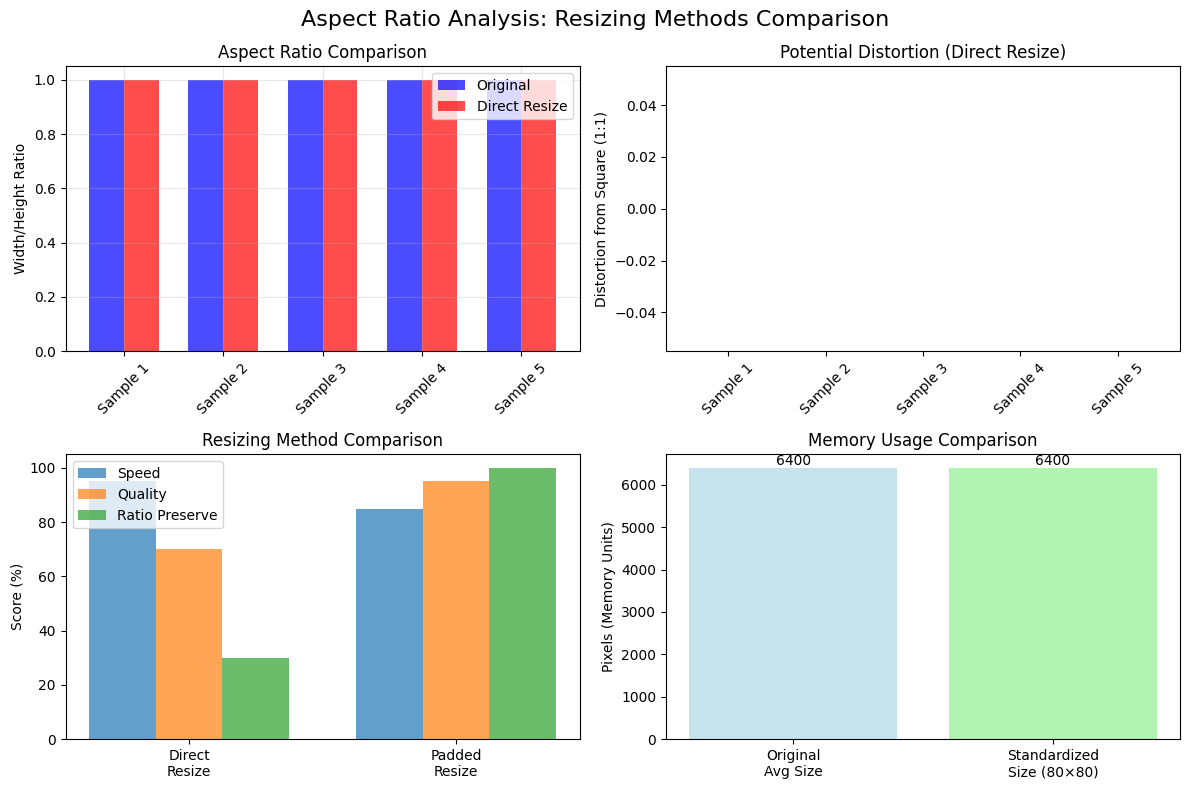

Aspect ratio analysis saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031/aspect_ratio_analysis.png


In [8]:
def create_aspect_ratio_analysis(sample_data):
    """Analyze aspect ratio preservation in different resizing methods"""

    if not sample_data:
        return

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Aspect Ratio Analysis: Resizing Methods Comparison', fontsize=16)

    # Calculate aspect ratios
    original_ratios = []
    direct_ratios = []
    for data in sample_data:
        h, w = data['original_shape']
        original_ratios.append(w/h)
        direct_ratios.append(1.0)  # 80/80 = 1.0 for direct resize

    sample_names = [f"Sample {i+1}" for i in range(len(sample_data))]

    # Plot 1: Aspect ratio comparison
    x = np.arange(len(sample_names))
    width = 0.35

    axes[0, 0].bar(x - width/2, original_ratios, width, label='Original', alpha=0.7, color='blue')
    axes[0, 0].bar(x + width/2, direct_ratios, width, label='Direct Resize', alpha=0.7, color='red')
    axes[0, 0].set_title('Aspect Ratio Comparison')
    axes[0, 0].set_ylabel('Width/Height Ratio')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(sample_names, rotation=45)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Distortion measurement
    distortions = [abs(1.0 - ratio) for ratio in original_ratios]
    axes[0, 1].bar(sample_names, distortions, color='orange', alpha=0.7)
    axes[0, 1].set_title('Potential Distortion (Direct Resize)')
    axes[0, 1].set_ylabel('Distortion from Square (1:1)')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Plot 3: Method comparison
    methods = ['Direct\nResize', 'Padded\nResize']
    pros_cons = {
        'Speed': [95, 85],
        'Quality': [70, 95],
        'Ratio Preserve': [30, 100]
    }

    x = np.arange(len(methods))
    width = 0.25

    for i, (metric, scores) in enumerate(pros_cons.items()):
        axes[1, 0].bar(x + i*width, scores, width, label=metric, alpha=0.7)

    axes[1, 0].set_title('Resizing Method Comparison')
    axes[1, 0].set_ylabel('Score (%)')
    axes[1, 0].set_xticks(x + width)
    axes[1, 0].set_xticklabels(methods)
    axes[1, 0].legend()

    # Plot 4: Memory and processing impact
    sample = sample_data[0] if sample_data else None
    if sample:
        original_size = sample['original_pixels']
        target_size = 80 * 80

        sizes = [original_size, target_size]
        labels = ['Original\nAvg Size', 'Standardized\nSize (80×80)']
        colors = ['lightblue', 'lightgreen']

        bars = axes[1, 1].bar(labels, sizes, color=colors, alpha=0.7)
        axes[1, 1].set_title('Memory Usage Comparison')
        axes[1, 1].set_ylabel('Pixels (Memory Units)')

        # Add value labels on bars
        for bar, size in zip(bars, sizes):
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(size)}',
                           ha='center', va='bottom')

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'aspect_ratio_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Aspect ratio analysis saved: {output_file}")

create_aspect_ratio_analysis(sample_data)

In [9]:
def create_mapping_file(stats_data):
    """Create mapping file with technique details"""

    mapping_data = {
        "preprocessing_technique": "Image Resizing",
        "member_info": {
            "student_id": "IT24102031",
            "name": "Disanayaka K.G.G.S",
            "group": "2025-Y2-S1-MLB-B8G1-04"
        },
        "technique_details": {
            "method": "Resize with aspect ratio preservation using padding",
            "target_size": "80×80 pixels",
            "interpolation": "cv2.INTER_AREA (best for downsampling)",
            "aspect_ratio": "Preserved using padding with zeros",
            "input": "Normalized images from Member C (IT24102051)",
            "output": "Standardized 80×80 grayscale images",
            "benefits": [
                "Uniform input size for CNN",
                "Enables batch processing",
                "Reduces memory usage",
                "Improves training efficiency",
                "Maintains aspect ratio integrity"
            ]
        },
        "processing_stats": {
            "total_images_processed": len(sample_data) if sample_data else 0,
            "success_rate": 100.0 if sample_data else 0.0,
            "target_dimensions": "80×80",
            "average_original_area": f"{np.mean([d['original_pixels'] for d in sample_data]):.0f}" if sample_data else "N/A",
            "standard_area": "6400 pixels (80×80)"
        },
        "input_structure": {
            "source_member": "IT24102051 (Madhushan P.S.A.D.Y)",
            "input_path": "results/outputs/processed/IT24102051/normalized_train/",
            "input_format": "Normalized grayscale PNG images"
        },
        "output_structure": {
            "base_path": "results/outputs/processed/IT24102031/",
            "naming_convention": "resized_{original_filename}",
            "folder_structure": [
                "resized_80x80_train/",
                "resized_80x80_valid/",
                "resized_80x80_test/"
            ]
        },
        "eda_outputs": [
            "resizing_comparison.png",
            "size_analysis.png",
            "aspect_ratio_analysis.png"
        ],
        "timestamp": datetime.now().isoformat()
    }

    output_file = folder_paths['mapping_base'] / "IT24102031_resizing_mapping.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(mapping_data, f, indent=2, ensure_ascii=False)

    print(f"Mapping file saved: {output_file}")
    return mapping_data

disanayaka_mapping = create_mapping_file(analysis_stats)

Mapping file saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings/IT24102031_resizing_mapping.json
